# Support Vector Machines

A nonparametric model.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import svm as SVM, metrics, model_selection, preprocessing
from utils import plot_decision

## Load and prep the data

In [2]:
# load the iris data
df = pd.read_csv('data/iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
# select features
y = df['species_label']
X = df[['petal_length', 'petal_width']]

In [4]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# standardize the features
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train the (linear SVM) model and make predictions

In [6]:
# train the linear SVM
svm = SVM.SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# use the trained perceptron to make predictions with the test data
y_pred = svm.predict(X_test_std)

## Evaluate the model's performance

In [8]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.98


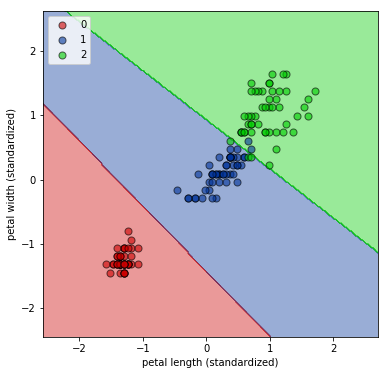

In [9]:
# visualize the model's decision regions to see how it separates the samples
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined_std, y=y_combined, classifier=svm)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

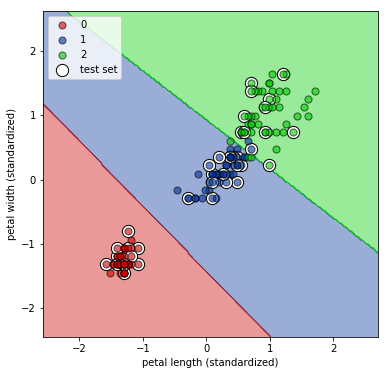

In [10]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined_std, y=y_combined, classifier=svm, test_idx=test_idx)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

## Use kernel SVM for nonlinear classification

Using a higher-dimension feature space and the radial basis function kernel.

In [11]:
# first, make the data
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

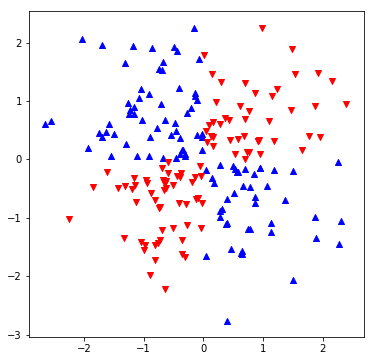

In [12]:
# then visualize it
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='^', label='1')
ax.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='v', label='-1')
plt.show()

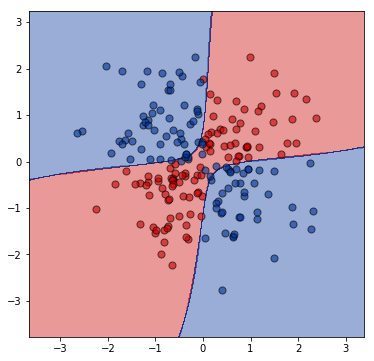

In [13]:
svm = SVM.SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision(X_xor, y_xor, classifier=svm)
plt.show()

## Now demonstrate kernel SVM on the iris data

First use a low gamma (cut-off) parameter value for a soft decision boundary.

In [14]:
svm = SVM.SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

# make predictions and evaluate performance
y_pred = svm.predict(X_test_std)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.98


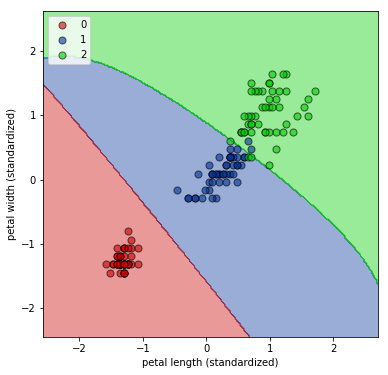

In [15]:
plot_decision(X=X_combined_std, y=y_combined, classifier=svm)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

#### Higher gamma parameter values lead to tighter decision boundaries:

In [16]:
svm = SVM.SVC(kernel='rbf', random_state=0, gamma=100, C=1)
svm.fit(X_train_std, y_train)

# make predictions and evaluate performance
y_pred = svm.predict(X_test_std)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 9
Accuracy: 0.80


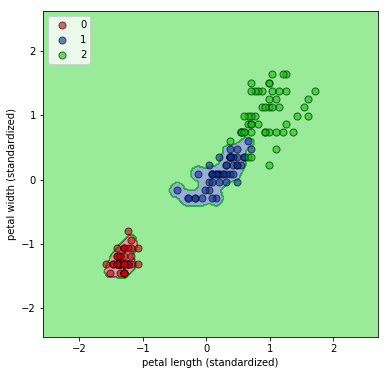

In [17]:
plot_decision(X=X_combined_std, y=y_combined, classifier=svm)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

Here we have a high generalization error because the model was overfitted with that high gamma value.